In [2]:
import pandas as pd
import numpy as np

# Data pre-processing
import nltk
# List of stop words used for data pre-processing
from stop_words_list import stop_words_list
from nltk.corpus import stopwords

# Sentiment Analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Topics modelling
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [3]:
# listOfCreator: "MKBHD", "Jonathan Morrison", "Unbox Therapy", "Chris Stuckman", "Jeremy Jahns", "Channel Awesome", "James Charles", "NikkieTutorials", "sophdoeslife"

creator = "Unbox Therapy"
output_df = pd.read_excel(f"./comments_spreadsheets/extracted_comments_{creator}.xlsx")

In [4]:
duplicates = output_df[output_df.duplicated(("Comments"))]
print ("Count of duplicate comments in dataframe"
, duplicates.shape[0])

print ("Count of unique comments in dataframe"
, output_df.shape[0] - duplicates.shape[0])

# Remove duplicated comments from dataset
unique_df = output_df.drop_duplicates(subset=["Comments"], keep='first')
# unique_df.to_excel(excel_writer=r"./extracted_comments_MKBHD_Samsung_Galaxy_Review.xlsx", index=False, header=True)
# df = pd.read_excel("extracted_comments_MKBHD_Samsung_Galaxy_Review.xlsx")
df = unique_df.reset_index()

# Removes line return "\n"
df = df.replace(r'\n',' ', regex=True)

# display(unique_df)
display(df)

Count of duplicate comments in dataframe 23
Count of unique comments in dataframe 1977


,index,Video ID,Comment ID,Comments
0,0,g0AOf2AZ-8w,UgztUIzy3HRj-l74t6N4AaABAg,Thanks for subscribing - https://youtube.com/u...
1,1,g0AOf2AZ-8w,UgxC2NMehnqU8Ldzj894AaABAg,2016: no headphone jack 2020: no charger 20...
2,2,g0AOf2AZ-8w,UgwJrfvrEKLV6mFD5HV4AaABAg,"I think I'll stick with my iPhone 11, not much..."
3,3,g0AOf2AZ-8w,UgxpqFu8bJx7MgKpns94AaABAg,I’ve kept the iPhone SE for so long it literal...
4,4,g0AOf2AZ-8w,UgyT5SozX1bBnYJN8ht4AaABAg,I love how he plays around with those phones l...
...,...,...,...,...
1972,1995,g0AOf2AZ-8w,Ugzze391m-FLLZQb_Tp4AaABAg,*Subtitles PLS!*
1973,1996,g0AOf2AZ-8w,Ugy2Hz05dhPuxwHDmct4AaABAg,Babu bhaiya- raju ye iphone 12 kab liya ree tu...
1974,1997,g0AOf2AZ-8w,UgzHjGM9MCtkG7S0Hq94AaABAg,I wonder what Steve Jobs thoughts would be abo...
1975,1998,g0AOf2AZ-8w,UgypPOeuG-3Roi3ILzN4AaABAg,iPhone mini I hate using big phones


# Sentiment Analysis

In [5]:
sentimentAnalyser = SentimentIntensityAnalyzer()
sentimentScoreList = []
sentimentLabelList = []

for i in df["Comments"].values.tolist():
    sentimentScore = sentimentAnalyser.polarity_scores(i)

    if sentimentScore['compound'] >= 0.05:
        sentimentScoreList.append(sentimentScore['compound'])
        sentimentLabelList.append('Positive')
    elif sentimentScore['compound'] > -0.05 and sentimentScore['compound'] < 0.05:
        sentimentScoreList.append(sentimentScore['compound'])
        sentimentLabelList.append('Neutral')
    elif sentimentScore['compound'] <= -0.05:
        sentimentScoreList.append(sentimentScore['compound'])
        sentimentLabelList.append('Negative')

df["Sentiment"] = sentimentLabelList
df["Sentiment Score"] = sentimentScoreList

display(df)

,index,Video ID,Comment ID,Comments,Sentiment,Sentiment Score
0,0,g0AOf2AZ-8w,UgztUIzy3HRj-l74t6N4AaABAg,Thanks for subscribing - https://youtube.com/u...,Positive,0.4404
1,1,g0AOf2AZ-8w,UgxC2NMehnqU8Ldzj894AaABAg,2016: no headphone jack 2020: no charger 20...,Negative,-0.7783
2,2,g0AOf2AZ-8w,UgwJrfvrEKLV6mFD5HV4AaABAg,"I think I'll stick with my iPhone 11, not much...",Neutral,0.0000
3,3,g0AOf2AZ-8w,UgxpqFu8bJx7MgKpns94AaABAg,I’ve kept the iPhone SE for so long it literal...,Positive,0.3612
4,4,g0AOf2AZ-8w,UgyT5SozX1bBnYJN8ht4AaABAg,I love how he plays around with those phones l...,Positive,0.8271
...,...,...,...,...,...,...
1972,1995,g0AOf2AZ-8w,Ugzze391m-FLLZQb_Tp4AaABAg,*Subtitles PLS!*,Positive,0.3237
1973,1996,g0AOf2AZ-8w,Ugy2Hz05dhPuxwHDmct4AaABAg,Babu bhaiya- raju ye iphone 12 kab liya ree tu...,Positive,0.9771
1974,1997,g0AOf2AZ-8w,UgzHjGM9MCtkG7S0Hq94AaABAg,I wonder what Steve Jobs thoughts would be abo...,Positive,0.9566
1975,1998,g0AOf2AZ-8w,UgypPOeuG-3Roi3ILzN4AaABAg,iPhone mini I hate using big phones,Negative,-0.5719


# Data Pre-Processing for LDA Model
1. Lowercase the letters
2. Remove the punctuation
3. Remove the number
4. Remove extra whitespaces
5. Tokenisation
6. Remove the stopwords

In [6]:
# def lemmatize_text(text):
#     lemmatizer = WordNetLemmatizer()
#     return [lemmatizer.lemmatize(w) for w in text]

# Convert case text as lowercase, remove punctuation, remove extra whitespace in string and on both sides of string
# Lowercase all the letters
df['lower'] = df['Comments'].str.lower()

# Remove punctuations
df['punctuation_removed'] = df['lower'].str.replace("'", '', regex=True).str.replace('[^\w\s]', ' ', regex=True)

# Remove numbers
df['numbers_removed'] = df['punctuation_removed'].str.replace(" \d+", " ", regex=True)

# Remove extra whitespace
df['extra_spaces_removed'] = df['numbers_removed'].str.replace(' +', ' ', regex=True).str.strip()

# Tokenise
df['tokenised'] = df.apply(lambda row: nltk.word_tokenize(row['extra_spaces_removed']), axis=1)

# Stop words removal
# initiate stopwords from nltk
stop_words = stopwords.words('english')
# add additional missing terms
stop_words.extend(stop_words_list)
# remove stopwords
df['removed_stopwords'] = df['tokenised'].apply(lambda x: [item for item in x if item not in stop_words])

display(df.head(10))

,index,Video ID,Comment ID,Comments,Sentiment,Sentiment Score,lower,punctuation_removed,numbers_removed,extra_spaces_removed,tokenised,removed_stopwords
0,0,g0AOf2AZ-8w,UgztUIzy3HRj-l74t6N4AaABAg,Thanks for subscribing - https://youtube.com/u...,Positive,0.4404,thanks for subscribing - https://youtube.com/u...,thanks for subscribing https youtube com u...,thanks for subscribing https youtube com u...,thanks for subscribing https youtube com unbox...,"[thanks, for, subscribing, https, youtube, com...","[subscribing, https, youtube, unboxtherapy]"
1,1,g0AOf2AZ-8w,UgxC2NMehnqU8Ldzj894AaABAg,2016: no headphone jack 2020: no charger 20...,Negative,-0.7783,2016: no headphone jack 2020: no charger 20...,2016 no headphone jack 2020 no charger 20...,2016 no headphone jack no charger no c...,2016 no headphone jack no charger no charging ...,"[2016, no, headphone, jack, no, charger, no, c...","[2016, headphone, jack, charger, charging, cab..."
2,2,g0AOf2AZ-8w,UgwJrfvrEKLV6mFD5HV4AaABAg,"I think I'll stick with my iPhone 11, not much...",Neutral,0.0000,"i think i'll stick with my iphone 11, not much...",i think ill stick with my iphone 11 not much ...,i think ill stick with my iphone not much se...,i think ill stick with my iphone not much seem...,"[i, think, ill, stick, with, my, iphone, not, ...","[stick, iphone, changed]"
3,3,g0AOf2AZ-8w,UgxpqFu8bJx7MgKpns94AaABAg,I’ve kept the iPhone SE for so long it literal...,Positive,0.3612,i’ve kept the iphone se for so long it literal...,i ve kept the iphone se for so long it literal...,i ve kept the iphone se for so long it literal...,i ve kept the iphone se for so long it literal...,"[i, ve, kept, the, iphone, se, for, so, long, ...","[iphone, se, long, literally, boomerang]"
4,4,g0AOf2AZ-8w,UgyT5SozX1bBnYJN8ht4AaABAg,I love how he plays around with those phones l...,Positive,0.8271,i love how he plays around with those phones l...,i love how he plays around with those phones l...,i love how he plays around with those phones l...,i love how he plays around with those phones l...,"[i, love, how, he, plays, around, with, those,...","[plays, phones, casino, cards]"
5,5,g0AOf2AZ-8w,UgwWjr_N7pffk9Sevi94AaABAg,"Apple: No charger and earphones for ""environme...",Negative,-0.2960,"apple: no charger and earphones for ""environme...",apple no charger and earphones for environme...,apple no charger and earphones for environme...,apple no charger and earphones for environment...,"[apple, no, charger, and, earphones, for, envi...","[apple, charger, earphones, environmental, rea..."
6,6,g0AOf2AZ-8w,Ugw3NjdDfH6nA5yCvc94AaABAg,I planned an iPhone upgrade this year but I’m ...,Positive,0.9504,i planned an iphone upgrade this year but i’m ...,i planned an iphone upgrade this year but i m ...,i planned an iphone upgrade this year but i m ...,i planned an iphone upgrade this year but i m ...,"[i, planned, an, iphone, upgrade, this, year, ...","[planned, iphone, upgrade, year, impressed, ap..."
7,7,g0AOf2AZ-8w,Ugx9ND3yC3n5_TEjjXh4AaABAg,"2025: No box, just phone 2030: No phone, Just ...",Negative,-0.6808,"2025: no box, just phone 2030: no phone, just ...",2025 no box just phone 2030 no phone just ...,2025 no box just phone no phone just appl...,2025 no box just phone no phone just apple sti...,"[2025, no, box, just, phone, no, phone, just, ...","[2025, box, phone, phone, apple, sticker, apple]"
8,8,g0AOf2AZ-8w,UgyxVKX2qtbVE4d4uKZ4AaABAg,"""An apple a year makes your money disappear""",Negative,-0.2263,"""an apple a year makes your money disappear""",an apple a year makes your money disappear,an apple a year makes your money disappear,an apple a year makes your money disappear,"[an, apple, a, year, makes, your, money, disap...","[apple, year, money, disappear]"
9,9,g0AOf2AZ-8w,UgwDjkn_hc4QwRHRWtd4AaABAg,Very informative and comprehensive review of t...,Positive,0.9211,very informative and comprehensive review of t...,very informative and comprehensive review of t...,very informative and comprehensive review of t..

# Vectorisation for LDA model

In [7]:
# initialise the count vectorizer
vectorizer = CountVectorizer(analyzer = 'word', ngram_range = (2, 2))

# join the processed data to be vectorised

vectors = []

for index, row in df.iterrows():
    vectors.append(", ".join(row["removed_stopwords"]))

vectorised = vectorizer.fit_transform(vectors)

print(vectorised)

  (0, 9711)	1
  (0, 4570)	1
  (0, 11264)	1
  (1, 12)	1
  (1, 4335)	1
  (1, 5459)	1
  (1, 1859)	1
  (1, 1956)	1
  (1, 1512)	1
  (2, 9578)	1
  (2, 5009)	1
  (3, 5266)	1
  (3, 8861)	1
  (3, 5935)	1
  (3, 5851)	1
  (4, 7651)	1
  (4, 7490)	1
  (4, 1748)	1
  (5, 372)	1
  (5, 1866)	1
  (5, 2996)	1
  (5, 3192)	1
  (5, 8273)	1
  (5, 424)	1
  (5, 3977)	1
  :	:
  (1974, 10080)	1
  (1974, 2799)	1
  (1974, 6175)	1
  (1974, 2800)	1
  (1974, 10787)	1
  (1974, 6633)	1
  (1974, 5512)	1
  (1974, 7611)	1
  (1974, 10305)	1
  (1974, 10679)	1
  (1974, 4470)	1
  (1974, 2349)	1
  (1974, 9912)	1
  (1974, 10139)	1
  (1974, 4494)	1
  (1974, 5405)	1
  (1974, 6632)	1
  (1974, 9162)	1
  (1974, 8166)	1
  (1975, 5175)	1
  (1975, 1002)	1
  (1975, 6435)	1
  (1975, 4310)	1
  (1976, 6372)	1
  (1976, 6653)	1


# Topic Modelling Using LDA

In [8]:
# Initialise LDA Model
lda_model = LatentDirichletAllocation(n_components = 3, # number of topics
                                      random_state = 1,     # random state USED TO BE 10
                                      evaluate_every = -1,  # compute perplexity every n iters, default: Don't
                                      n_jobs = -1,         # Use all available CPUs
                                 )

# Returns a list of probability of belonging to each topic for each comment
lda_output = lda_model.fit_transform(vectorised)

# Column names
topic_names = ["Topic" + str(i) for i in range(1, lda_model.n_components + 1)]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns = topic_names)

# Get dominant topic for each document
dominant_topic = (np.argmax(df_document_topic.values, axis=1)+1)
df_document_topic['Dominant_topic'] = dominant_topic

# Join to original dataframes

df = pd.merge(df, df_document_topic, left_index = True, right_index = True, how = 'outer')
display(df.head(10))

,index,Video ID,Comment ID,Comments,Sentiment,Sentiment Score,lower,punctuation_removed,numbers_removed,extra_spaces_removed,tokenised,removed_stopwords,Topic1,Topic2,Topic3,Dominant_topic
0,0,g0AOf2AZ-8w,UgztUIzy3HRj-l74t6N4AaABAg,Thanks for subscribing - https://youtube.com/u...,Positive,0.4404,thanks for subscribing - https://youtube.com/u...,thanks for subscribing https youtube com u...,thanks for subscribing https youtube com u...,thanks for subscribing https youtube com unbox...,"[thanks, for, subscribing, https, youtube, com...","[subscribing, https, youtube, unboxtherapy]",0.08,0.83,0.08,2
1,1,g0AOf2AZ-8w,UgxC2NMehnqU8Ldzj894AaABAg,2016: no headphone jack 2020: no charger 20...,Negative,-0.7783,2016: no headphone jack 2020: no charger 20...,2016 no headphone jack 2020 no charger 20...,2016 no headphone jack no charger no c...,2016 no headphone jack no charger no charging ...,"[2016, no, headphone, jack, no, charger, no, c...","[2016, headphone, jack, charger, charging, cab...",0.05,0.90,0.05,2
2,2,g0AOf2AZ-8w,UgwJrfvrEKLV6mFD5HV4AaABAg,"I think I'll stick with my iPhone 11, not much...",Neutral,0.0000,"i think i'll stick with my iphone 11, not much...",i think ill stick with my iphone 11 not much ...,i think ill stick with my iphone not much se...,i think ill stick with my iphone not much seem...,"[i, think, ill, stick, with, my, iphone, not, ...","[stick, iphone, changed]",0.77,0.11,0.11,1
3,3,g0AOf2AZ-8w,UgxpqFu8bJx7MgKpns94AaABAg,I’ve kept the iPhone SE for so long it literal...,Positive,0.3612,i’ve kept the iphone se for so long it literal...,i ve kept the iphone se for so long it literal...,i ve kept the iphone se for so long it literal...,i ve kept the iphone se for so long it literal...,"[i, ve, kept, the, iphone, se, for, so, long, ...","[iphone, se, long, literally, boomerang]",0.07,0.86,0.07,2
4,4,g0AOf2AZ-8w,UgyT5SozX1bBnYJN8ht4AaABAg,I love how he plays around with those phones l...,Positive,0.8271,i love how he plays around with those phones l...,i love how he plays around with those phones l...,i love how he plays around with those phones l...,i love how he plays around with those phones l...,"[i, love, how, he, plays, around, with, those,...","[plays, phones, casino, cards]",0.08,0.83,0.08,2
5,5,g0AOf2AZ-8w,UgwWjr_N7pffk9Sevi94AaABAg,"Apple: No charger and earphones for ""environme...",Negative,-0.2960,"apple: no charger and earphones for ""environme...",apple no charger and earphones for environme...,apple no charger and earphones for environme...,apple no charger and earphones for environment...,"[apple, no, charger, and, earphones, for, envi...","[apple, charger, earphones, environmental, rea...",0.96,0.02,0.02,1
6,6,g0AOf2AZ-8w,Ugw3NjdDfH6nA5yCvc94AaABAg,I planned an iPhone upgrade this year but I’m ...,Positive,0.9504,i planned an iphone upgrade this year but i’m ...,i planned an iphone upgrade this year but i m ...,i planned an iphone upgrade this year but i m ...,i planned an iphone upgrade this year but i m ...,"[i, planned, an, iphone, upgrade, this, year, ...","[planned, iphone, upgrade, year, impressed, ap...",0.94,0.03,0.03,1
7,7,g0AOf2AZ-8w,Ugx9ND3yC3n5_TEjjXh4AaABAg,"2025: No box, just phone 2030: No phone, Just ...",Negative,-0.6808,"2025: no box, just phone 2030: no phone, just ...",2025 no box just phone 2030 no phone just ...,2025 no box just phone no phone just appl...,2025 no box just phone no phone just apple sti...,"[2025, no, box, just, phone, no, phone, just, ...","[2025, box, phone, phone, apple, sticker, apple]",0.05,0.05,0.90,3
8,8,g0AOf2AZ-8w,UgyxVKX2qtbVE4d4uKZ4AaABAg,"""An apple a year makes your money disappear""",Negative,-0.2263,"""an apple a year makes your money disappear""",an apple a year makes your money disappear,an apple a year makes your money disappear,an apple a year makes your money disappear,"[an, apple, a, year, makes, your, money, disap...","[apple, year, money, disappear]",0.83,0.08,0.08,1
9,9,g0AOf2AZ-8w,UgwDjkn_hc4QwRHRWtd4AaABAg,Very informative and comp

In [9]:
# index names
docnames = ['Doc' + str(i) for i in range(len(df))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topic_names, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# display(df_document_topic)

# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(lda_model.components_)

# Assign Column and Index
df_topic_keywords.columns = vectorizer.get_feature_names_out()
df_topic_keywords.index = topic_names

# display(df_topic_keywords)

df_topic_no = pd.DataFrame(df_topic_keywords.idxmax())
df_scores = pd.DataFrame(df_topic_keywords.max())

tmp = pd.merge(df_topic_no, df_scores, left_index=True, right_index=True)
tmp.columns = ['topic', 'relevance_score']

tmp["topic"] =  tmp.topic.str.extract('(\d+)')
tmp["topic"] = tmp["topic"].astype(int)

display(tmp)

,topic,relevance_score
10 years,1,1.332315
11 pro,3,1.330982
12 max,3,1.328261
12 mini,2,7.361218
12 pro,1,8.296777
...,...,...
zukunft ist,2,1.333294
zukunft von,2,1.333294
ítens básicos,3,1.333261
जय मह,2,1.330920


In [10]:
all_topics = []

for i in tmp['topic'].unique():
    tmp_1 = tmp.loc[tmp['topic'] == i].reset_index()
    tmp_1 = tmp_1.sort_values('relevance_score', ascending=False).head(1)

    # print(tmp_1)
    # print(tmp_1['topic'])
    # tmp_1['topic'] = tmp_1['topic'] + 1

    tmp_2 = []
    tmp_2.append(tmp_1['topic'].unique()[0])
    tmp_2.append(list(tmp_1['index'].unique()))
    all_topics.append(tmp_2)

all_topics = pd.DataFrame(all_topics, columns=['Dominant_topic', 'topic_name'])
display(all_topics)

,Dominant_topic,topic_name
0,1,[pro max]
1,3,[iphone iphone]
2,2,[iphone mini]


In [11]:
results = df.groupby(['Dominant_topic', 'Sentiment']).count().reset_index()
# display(results)

results = results.merge(all_topics, on='Dominant_topic')
results['topic_name'] = results['topic_name'].apply(', '.join)

# display(results)

graph_results = results[['topic_name', 'Sentiment', 'Sentiment Score']]
graph_results = graph_results.pivot(index='topic_name', columns='Sentiment', values='Sentiment Score').reset_index()

graph_results.set_index('topic_name', inplace=True)
display(graph_results)

Sentiment,Negative,Neutral,Positive
topic_name,,,
iphone iphone,118,179,299
iphone mini,119,182,340
pro max,152,241,347


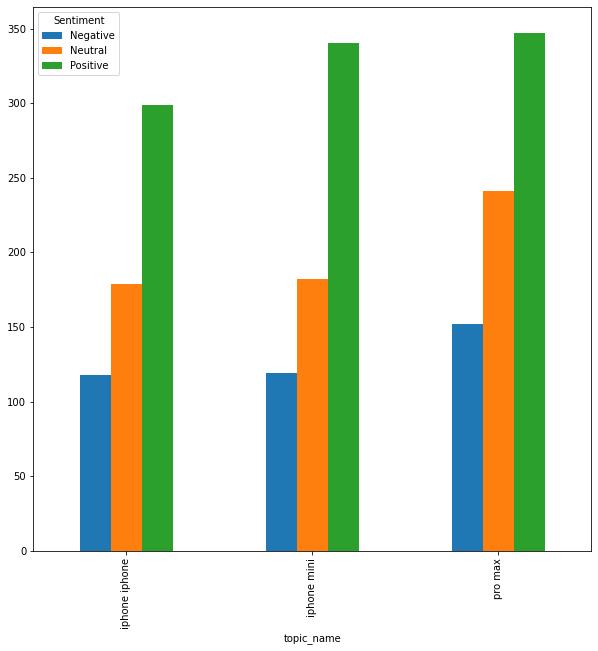

In [12]:
fig = graph_results.plot.bar(rot=90, figsize=(10,10))
# fig.figure.savefig(f'{creator}_absa_lda.png' , bbox_inches='tight')